# 2018-11-09 Showing MotionClouds to the Reti/LGN

In [3]:
import numpy as np
import Spiking_LGN as SpiLGN
import MotionClouds as mc

# MotionClouds

In [4]:
# (64x64)x128 frames @ 24 FPS = 5.2s stimuli
fx, fy, ft = mc.get_grids(64, 64, 128)

envelope = mc.envelope_gabor(fx, fy, ft,
                             V_X=1., V_Y=0., B_V=.1,
                             sf_0=.15, B_sf=.1,
                             theta=np.pi/3, B_theta=np.pi/12, alpha=1.)

movie = mc.random_cloud(envelope)
movie = mc.rectif(movie)

print('MC shape', movie.shape)

MC shape (64, 64, 128)


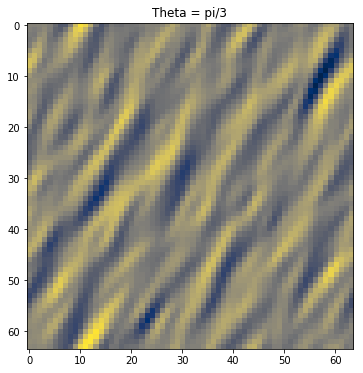

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
plt.imshow(movie[:,:,4], cmap = plt.cm.cividis)
plt.title('Theta = pi/3')
plt.savefig('./figs/2018_11_12_MotionCloud_example.pdf', format = 'pdf', bbox_inches = 'tight', dpi = 200)
plt.show()

In [5]:
np.save('./MotionClouds_64x64x128_24FPS.npy', movie)

# Current generation

In [5]:
video = np.load('./MotionClouds_64x64x128_24FPS.npy')

In [6]:
# then we run it into the method, careful here N_theta = 4
output_currents = SpiLGN.input_to_currents(video=video, FPS=24., total_time=1000,
                                           distrib_size=8, safeguard_offset=5, random_shift=1, grid_res=3,
                                           N_theta=4, B_theta=15, sf_0=.05, B_sf=.5,
                                           on_thresh=0, off_thresh=0,
                                           filter_size=2., filter_res=.1,
                                           sampling_rate = 1,
                                           n_jobs=-1, backend='loky', mt_verbose=10)

Video shape (64, 64, 128)
Frames per second: 24.0
Frame duration at 24.0 FPS: 41.67 ms
Video length inferred from fps: 6 s
FPS conversion sanity check passed !


Generating filters coordinates with gabors ..


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:  5.2min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  5.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  5.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Done ! Generating currents from filters ..


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:  4.5min remaining:  4.5min
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.6min finished


In [7]:
print('Output shape', np.asarray(output_currents).shape)
print('=(Thetas, Gabors, ON/OFF)')

Output shape (4, 49, 2)
=(Thetas, Gabors, ON/OFF)


# Comparing activity of cell whose preferred theta is that of the MC (pi/3)

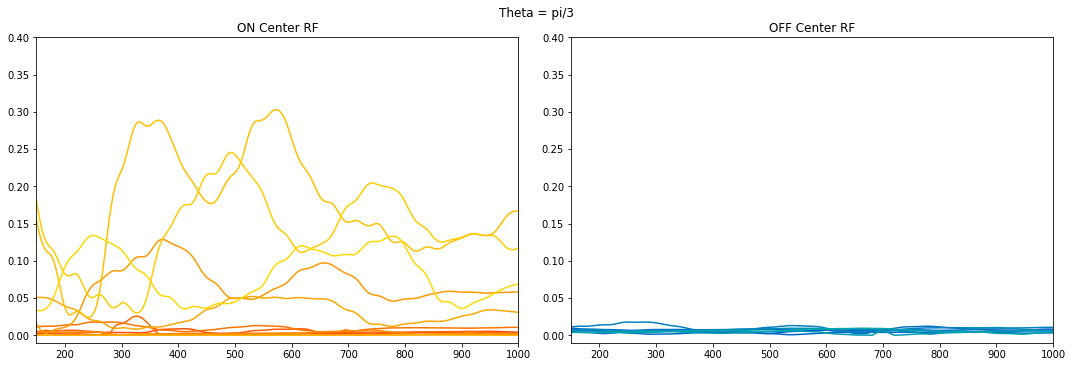

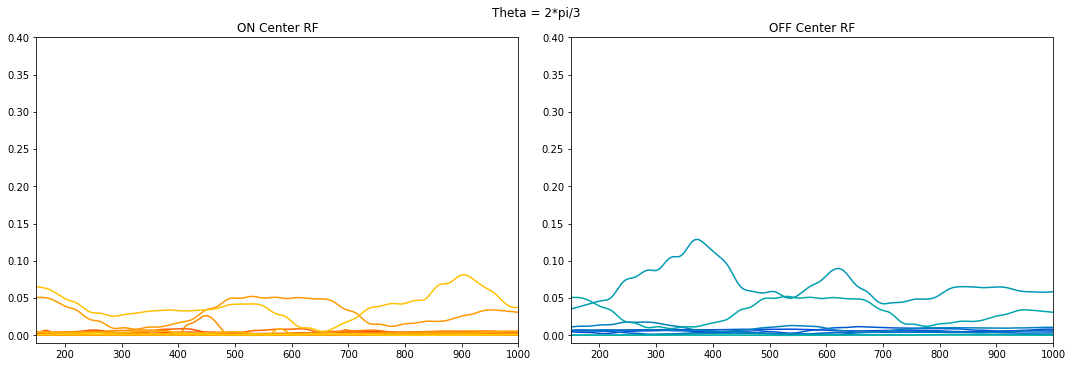

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# We show the second Theta (here pi/3) and third gabor (i.e. simple cell)
theta_display = 1
gabor_display = 3
on_st_levels = output_currents[theta_display][gabor_display][0]
off_st_levels = output_currents[theta_display][gabor_display][1]

colors = plt.cm.autumn(np.linspace(.3, 1,15))
for i, channels in enumerate(on_st_levels):
    axs[0].plot(channels, color = colors[i])

colors = plt.cm.winter(np.linspace(.3, 1,15))
for i, channels in enumerate(off_st_levels):
    axs[1].plot(channels, color = colors[i])

axs[0].set_title('ON Center RF')
axs[0].set_xlim(150,1000)
axs[0].set_ylim(-.01, .4)

axs[1].set_title('OFF Center RF')
axs[1].set_xlim(150, 1000)
axs[1].set_ylim(-.01, .4)
plt.suptitle(x=.5, y=1.01, t="Theta = pi/3")
plt.tight_layout()
plt.show()
plt.pause(.1)

#############################
#      Showtime part two    #
#############################
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# We show the second Theta (here 2*pi/3) and third gabor (i.e. simple cell)
theta_display = 2
gabor_display = 3
on_st_levels = output_currents[theta_display][gabor_display][0]
off_st_levels = output_currents[theta_display][gabor_display][1]

colors = plt.cm.autumn(np.linspace(.3, 1,15))
for i, channels in enumerate(on_st_levels):
    axs[0].plot(channels, color = colors[i])

colors = plt.cm.winter(np.linspace(.3, 1,15))
for i, channels in enumerate(off_st_levels):
    axs[1].plot(channels, color = colors[i])

axs[0].set_title('ON Center RF')
axs[0].set_xlim(150,1000)
axs[0].set_ylim(-.01, .4)

axs[1].set_title('OFF Center RF')
axs[1].set_xlim(150, 1000)
axs[1].set_ylim(-.01, .4)
plt.suptitle(x=.5, y=1.01, t="Theta = 2*pi/3")
plt.tight_layout()

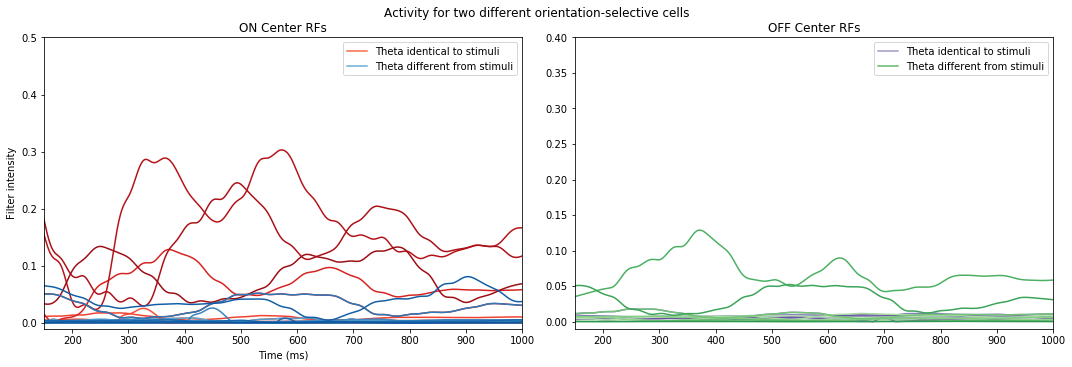

In [10]:
#Is superposition better looking ? 
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# We show the second Theta (here pi/3) and third gabor (i.e. simple cell)
theta_display = 1
gabor_display = 3
on_st_levels = output_currents[theta_display][gabor_display][0]
off_st_levels = output_currents[theta_display][gabor_display][1]

colors = plt.cm.Reds(np.linspace(.5, 1,15))
for i, channels in enumerate(on_st_levels):
    axs[0].plot(channels, color = colors[i], 
                label = 'Theta identical to stimuli' if i == 0 else '')
axs[0].legend()

colors = plt.cm.Purples(np.linspace(.5, 1,15))
for i, channels in enumerate(off_st_levels):
    axs[1].plot(channels, color = colors[i], 
                label = 'Theta identical to stimuli' if i == 0 else '')
axs[1].legend()


# We show the second Theta (here 2*pi/3) and third gabor (i.e. simple cell)
theta_display = 2
gabor_display = 3
on_st_levels = output_currents[theta_display][gabor_display][0]
off_st_levels = output_currents[theta_display][gabor_display][1]

colors = plt.cm.Blues(np.linspace(.5, 1,15))
for i, channels in enumerate(on_st_levels):
    axs[0].plot(channels, color = colors[i],
               label = 'Theta different from stimuli' if i == 0 else '')
axs[0].legend()

colors = plt.cm.Greens(np.linspace(.3, 1,15))
for i, channels in enumerate(off_st_levels):
    axs[1].plot(channels, color = colors[i],
               label = 'Theta different from stimuli' if i == 5 else '')
axs[1].legend()

axs[0].set_title('ON Center RFs')
axs[0].set_xlim(150,1000)
axs[0].set_ylim(-.01, .5)

axs[1].set_title('OFF Center RFs')
axs[1].set_xlim(150, 1000)
axs[1].set_ylim(-.01, .4)

axs[0].set_ylabel('Filter intensity')
axs[0].set_xlabel('Time (ms)')


plt.suptitle(x=.5, y=1.01, t="Activity for two different orientation-selective cells")

plt.tight_layout()
plt.savefig('./figs/2018_11_12_Orientation_selective_currents.pdf', format = 'pdf', dpi = 200, 
           bbox_inches = 'tight')
plt.show()

# Lowering temporal resolution, lowers overall activation, not advised

In [20]:
# then we run it into the method, careful here N_theta = 4
output_currents = SpiLGN.input_to_currents(video=video, FPS=24., total_time=1000,
                                           distrib_size=8, safeguard_offset=5, random_shift=1, grid_res=3,
                                           N_theta=4, B_theta=15, sf_0=.05, B_sf=.5,
                                           on_thresh=0, off_thresh=0,
                                           filter_size=2., filter_res=.1,
                                           sampling_rate = 2,
                                           n_jobs=-1, backend='loky', mt_verbose=10)

Video shape (64, 64, 128)
Frames per second: 24.0
Frame duration at 24.0 FPS: 41.67 ms
Video length inferred from fps: 6 s
FPS conversion sanity check passed !


Generating filters coordinates with gabors ..


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:  4.8min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Done ! Generating currents from filters ..


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:  2.1min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.1min finished


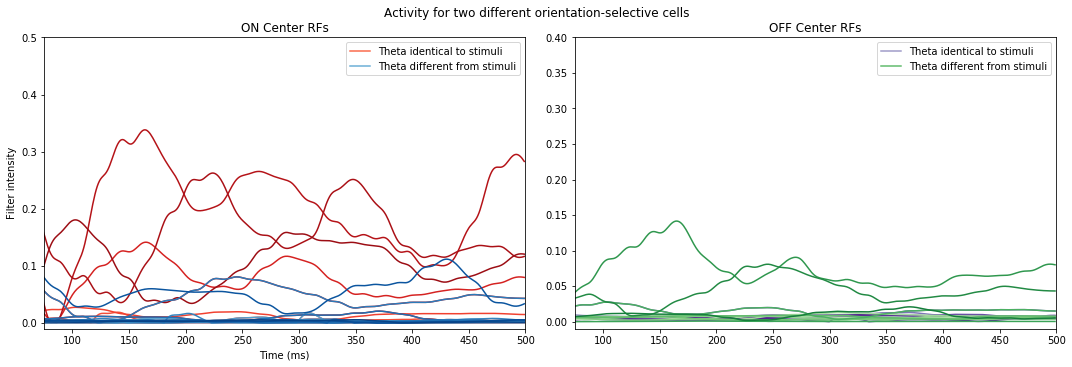

In [23]:
#Is superposition better looking ? 
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# We show the second Theta (here pi/3) and third gabor (i.e. simple cell)
theta_display = 1
gabor_display = 3
on_st_levels = output_currents[theta_display][gabor_display][0]
off_st_levels = output_currents[theta_display][gabor_display][1]

colors = plt.cm.Reds(np.linspace(.5, 1,15))
for i, channels in enumerate(on_st_levels):
    axs[0].plot(channels, color = colors[i], 
                label = 'Theta identical to stimuli' if i == 0 else '')
axs[0].legend()

colors = plt.cm.Purples(np.linspace(.5, 1,15))
for i, channels in enumerate(off_st_levels):
    axs[1].plot(channels, color = colors[i], 
                label = 'Theta identical to stimuli' if i == 0 else '')
axs[1].legend()


# We show the second Theta (here 2*pi/3) and third gabor (i.e. simple cell)
theta_display = 2
gabor_display = 3
on_st_levels = output_currents[theta_display][gabor_display][0]
off_st_levels = output_currents[theta_display][gabor_display][1]

colors = plt.cm.Blues(np.linspace(.5, 1,15))
for i, channels in enumerate(on_st_levels):
    axs[0].plot(channels, color = colors[i],
               label = 'Theta different from stimuli' if i == 0 else '')
axs[0].legend()

colors = plt.cm.Greens(np.linspace(.3, 1,15))
for i, channels in enumerate(off_st_levels):
    axs[1].plot(channels, color = colors[i],
               label = 'Theta different from stimuli' if i == 5 else '')
axs[1].legend()

axs[0].set_title('ON Center RFs')
axs[0].set_xlim(75,500)
axs[0].set_ylim(-.01, .5)

axs[1].set_title('OFF Center RFs')
axs[1].set_xlim(75, 500)
axs[1].set_ylim(-.01, .4)

axs[0].set_ylabel('Filter intensity')
axs[0].set_xlabel('Time (ms)')


plt.suptitle(x=.5, y=1.01, t="Activity for two different orientation-selective cells")

plt.tight_layout()

plt.show()

#Now we save the currents, in a numpy compressed array to save space (2.5x less size)
#tradeoff : saving twice as slow
import datetime

now = datetime.datetime.now()
strtime = now.strftime("%Y-%m-%d_%H_%M")   
np.savez_compressed('./output/%s'%strtime, output_currents)